<div style="background-color: #45818e; padding: 10px; border-radius: 5px;">

# Проект: Исследование стартапов

<div style="background-color: #76a5af; padding: 10px; border-radius: 5px;">

## 1. Цель проекта

Провести комплексный анализ исторических данных для финансовой компании с целью разработки модели бизнеса по инвестированию в перспективные стартапы, включающий в себя:

    Подготовку и очистку датасета:
        Проверить целостность и качество данных
        Выявить и обработать пропущенные значения
        Устранить аномалии и выбросы
    Валидацию данных:
        Проверить соответствие данных здравому смыслу и бизнес-логике
        Оценить потенциальные искажения в данных
    Проведение исследовательского анализа:
        Определить наиболее перспективные отрасли и типы стартапов для инвестирования
    Разработку рекомендаций:
        Предложить стратегии по выбору, развитию и перепродаже стартапов
        Определить ключевые метрики для оценки потенциала стартапов

**Конечная цель** - предоставить компании надежную аналитическую основу для принятия обоснованных решений при выходе на инвестиционный рынок стартапов, учитывая ограничения имеющихся данных и потенциальные риски.

Начнём с загрузки библиотек и датасетов. Будем использовать `pandas` и библиотеки визуализации данных `matplotlib` и `seaborn`, библиотеку `skimpy` для первичного комплексного анализа датасетов, а также `phik` для построения матрицы корреляции. Данные датасетов сохраним в соответствующих переменных.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
from skimpy import skim
from scipy.stats import percentileofscore
import warnings

In [2]:
# Округляем все будущие float данные до двух значений после запятой
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Отключаем уведомления о будущих обновлениях
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
# acquisition dataset
try:
    acq_df = pd.read_csv('/home/ray/Загрузки/Ya.Practikum/Proj_FinCo/acquisition.csv') 
except:
    acq_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

# company_and_rounds dataset
try:
    company_df = pd.read_csv('/home/ray/Загрузки/Ya.Practikum/Proj_FinCo/company_and_rounds.csv')
except:
    company_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

# degrees dataset
try:
    degrees_df = pd.read_csv('/home/ray/Загрузки/Ya.Practikum/Proj_FinCo/degrees.csv')
except:
    degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

# education dataset
try:
    education_df = pd.read_csv('/home/ray/Загрузки/Ya.Practikum/Proj_FinCo/education.csv')
except:
    education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

# people dataset
try:
    people_df = pd.read_csv('/home/ray/Загрузки/Ya.Practikum/Proj_FinCo/people.csv')
except:
    people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

# fund dataset
try:
    fund_df = pd.read_csv('/home/ray/Загрузки/Ya.Practikum/Proj_FinCo/fund.csv')
except:
    fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

# investment dataset
try:
    investment_df = pd.read_csv('/home/ray/Загрузки/Ya.Practikum/Proj_FinCo/investment.csv')
except:
    investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

<div style="background-color: #a2c4c9; padding: 10px; border-radius: 5px;">

### Знакомство с данными и их предобработка

Ознакамливаемся с данными каждого из представленных датасетов, обращая внимание на значащие для будущего анализа аспекты данных, а также приводя их к оптимизированному формату

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

#### Acquisition 

In [5]:
print(skim(acq_df))
print(acq_df.info())
acq_df.head()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9407   │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA % ┃ mean      ┃ sd          ┃ p0 ┃ p25   ┃ p50   ┃ p75   ┃ p100          ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id             │  0 │    0 │      5257 │        3006 │  1 │  2682 │  5178 │  7842 │         10530 │ ▇██▇▇▇ │  │
│ │ acquiring_comp │  0 │    0 │     49790 │       69060 │  4 │  3246 │ 26110 │ 56150 │        286000 │  █▂ ▁  │  │
│ │ any_id         │    │      │           │             │    │       │       │       │               │        │  │
│ │ acquired_compa │  0 │    0 │     71690 │       73030 │  4 │ 23120 │ 45130 │ 81200 │        286200 │ █▄ ▂▁▁ │  │
│ │ ny_id          │    │      │           │             │    │       │       │       │               │        │  │
│ │ price_amount   │  0 │    0 │ 393300000 │ 26820000000 │  0 │     0 │     0 │ 23430 │ 2600000000000 │   █    │  │
│ └────────────────┴────┴──────┴───────────┴─────────────┴────┴───────┴───────┴───────┴───────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃          ┃           ┃          ┃ chars per ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest  ┃ min       ┃ max      ┃ row       ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ term_cod │ 7576 │ 80.53577 │ cash     │ cash_and │ cash      │ stock    │      6.45 │     0.19 │      1831 │  │
│ │ e        │      │ 12341873 │          │ _stock   │           │          │           │          │           │  │
│ │          │      │        1 │          │          │           │          │           │          │           │  │
│ │ acquired │   29 │ 0.308281 │ 2007-05- │ 2007-05- │ 1966-03-2 │ 2013-12- │        10 │        1 │      9378 │  │
│ │ _at      │      │ 06729031 │ 30       │ 30       │ 4         │ 12       │           │          │           │  │
│ │          │      │      574 │          │          │           │          │           │          │           │  │
│ └──────────┴──────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB
None


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


- `term_code` - столбец варианта расчета за поглощение компании имеет более 80% пропущенных значений и, к тому же, не очень необходим для достижения поставленных задач, поэтому от данного столбца можно избавиться
- Обращаем внимание для будущего анализа, что существует очень много покупок со стоимость в 0 долларов, так как 50-ый процентиль составляет значение 0
- `acquired_at` имеет минимальное значение датой `1966-03-24` -  стоит посмотреть на выборку данных во временном контексте и ограничить их хотя бы 2001 годом после очень сильно изменившего данную отрасль "кризиса доткомов"

Приведем данные сразу к необходимому формату даты и времени и построим гистограмму распределения дат полгощения компаний

Данные до 2001 года составляют всего 3.58% от общего объема данных


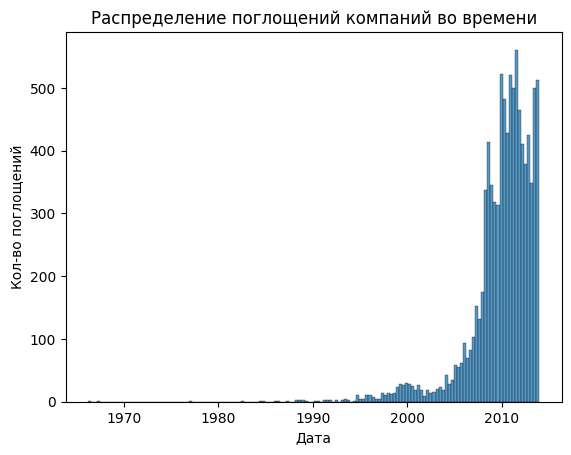

In [6]:
# Меняем тип данных 
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])

print(f"Данные до 2001 года составляют всего {round(acq_df[acq_df['acquired_at'] < '2001-01-01'].size / acq_df.size * 100, 2)}% от общего объема данных")

# Строим гистограмму
sns.histplot(data=acq_df['acquired_at'])
plt.title('Распределение поглощений компаний во времени')
plt.xlabel('Дата')
plt.ylabel('Кол-во поглощений')
plt.show()

- Удаляем данные столбца `acquired_at` до "кризиса доткомов" (до 2001 года) в датасете за их нерелевантностью и незначительностью в выборке
- Удаляем столбец `term_code` из-за большого количества пропущенных значений и отсутствием необходимости данного параметра в дальнейшем

In [7]:
# Удаляем данные
acq_df = acq_df[acq_df['acquired_at'] >= '2001-01-01']
acq_df = acq_df.drop('term_code', axis=1)

# Приводим к эффективному формату данные типа int
acq_numeral_columns = ['id', 'acquiring_company_id', 'acquired_company_id', 'price_amount']
acq_df[acq_numeral_columns] = acq_df[acq_numeral_columns].apply(
    pd.to_numeric, 
    downcast='integer')

# Выводим информацию для проверки
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9041 entries, 0 to 9406
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9041 non-null   int16         
 1   acquiring_company_id  9041 non-null   int32         
 2   acquired_company_id   9041 non-null   int32         
 3   price_amount          9041 non-null   int64         
 4   acquired_at           9041 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1)
memory usage: 300.2 KB


In [8]:
# Поиск дубликатов
acq_df.duplicated().sum()

np.int64(0)

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

#### Company

In [9]:
print(skim(company_df))
print(company_df.info())
company_df.head()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 217774 │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 22     │ │ string      │ 10    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA     ┃ NA %      ┃ mean    ┃ sd       ┃ p0 ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ company   │    302 │ 0.1386758 │  145300 │    92000 │  1 │  51960 │  165300 │  228200 │    286200 │ █▆▁▆▇▇ │  │
│ │ ID        │        │ 749896681 │         │          │    │        │         │         │           │        │  │
│ │           │        │         9 │         │          │    │        │         │         │           │        │  │
│ │ investmen │    302 │ 0.1386758 │ 0.03771 │    1.963 │  0 │      0 │       0 │       0 │       478 │   █    │  │
│ │ t  rounds │        │ 749896681 │         │          │    │        │         │         │           │        │  │
│ │           │        │         9 │         │          │    │        │         │         │           │        │  │
│ │ funding   │    302 │ 0.1386758 │  0.6122 │    1.433 │  0 │      0 │       0 │       0 │        15 │   █▁   │  │
│ │ rounds    │        │ 749896681 │         │          │    │        │         │         │           │        │  │
│ │           │        │         9 │         │          │    │        │         │         │           │        │  │
│ │ funding   │    302 │ 0.1386758 │ 5996000 │ 48930000 │  0 │      0 │       0 │       0 │ 570000000 │   █    │  │
│ │ total     │        │ 749896681 │         │          │    │        │         │         │         0 │        │  │
│ │           │        │         9 │         │          │    │        │         │         │           │        │  │
│ │ milestone │    302 │ 0.1386758 │  0.6504 │   0.8264 │  0 │      0 │       0 │       1 │         9 │   █▁   │  │
│ │ s         │        │ 749896681 │         │          │    │        │         │         │           │        │  │
│ │           │        │         9 │         │          │    │        │         │         │           │        │  │
│ │ funding   │ 164846 │ 75.695904 │   28960 │    16820 │  1 │  14340 │   28890 │   43560 │     57950 │ ██████ │  │
│ │ round  id │        │  92896306 │         │          │    │        │         │         │           │        │  │
│ │ company   │ 164846 │ 75.695904 │   98490 │    88430 │  1 │  26600 │   58080 │  171600 │    286200 │ █▃ ▃▂▂ │  │
│ │ id        │        │  92896306 │         │          │    │        │         │         │           │        │  │
│ │ raised    │ 164846 │ 75.695904 │ 7946000 │ 42170000 │  0 │ 246300 │ 1600000 │ 6700000 │ 383500000 │   █    │  │
│ │ amount    │        │  92896306 │         │          │    │        │         │         │         0 │        │  │
│ │ pre       │ 164846 │ 75.695904 │  329500 │ 65320000 │  0 │      0 │       0 │       0 │ 150000000 │   █    │  │
│ │ money     │        │  92896306 │         │          

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 no

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,5250000.00,0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,9500000.00,0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,2312.00,1.00,2008-05-19,series-c+,25000000.00,0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Необходимо привести формат названий столбцов к `snake_case` 
- Одинковое наименование столбцов`company ID` и `company id` требует дальнейшего анализа, так как столбцы могут как означать один и тот же параметр, так и абсолютно разные вещи
- Также обращаем внимание на количество пропусков превышающее 75% в столбцах, связанных с раундами и объёмом инвестиций в стартапы, которые как раз нам необходимы для дальнейшего анализа
- И видим такой же неоптимизированный формат хранения данных, который мы поменяем чуть позже

In [10]:
# Проверяем строки где не совпадают значения 'company  ID' и 'company  id'
company_df[(company_df['company  ID'] != company_df['company  id']) & (company_df['company  id'] > 0)]

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
217472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,457.00,1267.00,2005-01-01,series-a,48000000.00,0.00,2.00,1.00,1.00
217473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,471.00,558.00,2007-01-01,angel,300000.00,0.00,1.00,1.00,1.00
217474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,575.00,746.00,2004-09-01,angel,0.00,0.00,0.00,1.00,1.00
217475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,577.00,748.00,2007-01-01,series-a,1500000.00,2250000.00,0.00,1.00,1.00
217476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.00,804.00,2007-06-01,series-a,6000000.00,0.00,2.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.00,282847.00,2011-01-31,other,5500000.00,0.00,0.00,1.00,1.00
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.00,55477.00,2011-01-13,venture,10633300.00,0.00,0.00,0.00,1.00
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.00,55477.00,2012-05-31,venture,2125720.00,0.00,0.00,1.00,0.00
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.00,283492.00,2013-12-03,venture,3602480.00,0.00,5.00,1.00,1.00


- 302 строки, где различаются идентификатор датасета `company ID` и второстепенного `company id`
- Скорее всего данная ошибка относится к субъективному фактору конкретного исполнителя или техники (парсера или подобной программы), то есть скорее всего это MСAR ошибки и от них можно просто избавиться, удалив данный столбец

In [11]:
# Удаляем столбец 'company id'
company_df = company_df.drop('company  id', axis=1)

In [12]:
# Приводим к формату snake_case 
company_df.columns = company_df.columns.str.replace('  ', '_').str.lower()
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round'],
      dtype='object')

In [13]:
# Меняем временной тип данных 
company_df[['founded_at', 'closed_at', 'funded_at']] = company_df[['founded_at', 'closed_at', 'funded_at']].apply(
    pd.to_datetime, errors='coerce')

In [14]:
# Заполняем все пропуски значением "-1", которое не может быть использовано ни в одном числовом столбце 
# Для этого находим все числовые столбцы 
numeral_columns = company_df.select_dtypes(include=['float64']).columns

# Заполняем
company_df[numeral_columns] = company_df[numeral_columns].fillna(-1)

In [15]:
# Меняем численные типы данных 
# Проверяем наличие дробных чисел в столбце
for col in numeral_columns:
    fraction = (company_df[col] % 1 != 0).any()
    print(f'Столбец {col} с дробным значением {fraction}')
    
# Приводим к формату integer
for col in numeral_columns:
    company_df[col] = pd.to_numeric(company_df[col], downcast='integer')
    
company_df.info()

Столбец company_id с дробным значением False
Столбец investment_rounds с дробным значением False
Столбец funding_rounds с дробным значением False
Столбец funding_total с дробным значением False
Столбец milestones с дробным значением False
Столбец funding_round_id с дробным значением False
Столбец raised_amount с дробным значением False
Столбец pre_money_valuation с дробным значением False
Столбец participants с дробным значением False
Столбец is_first_round с дробным значением False
Столбец is_last_round с дробным значением False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217774 non-null  int32         
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   

/home/ray/.local/lib/python3.13/site-packages/pandas/core/dtypes/cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [16]:
# Поиск дубликатов
company_df.duplicated().sum()

np.int64(0)

Данные до 2001 года составляют всего 7.84% от общего объема данных


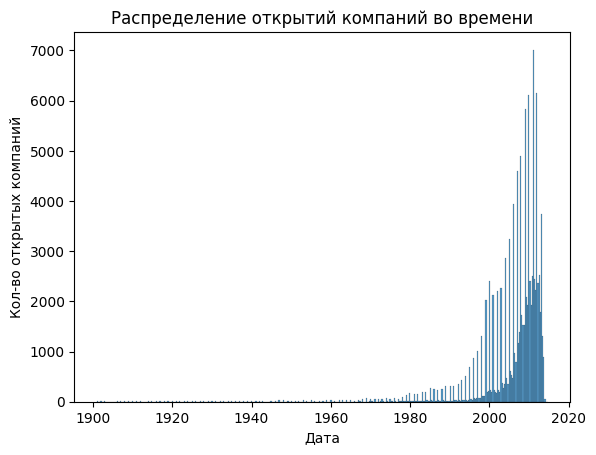

In [17]:
print(f"Данные до 2001 года составляют всего {round(company_df[company_df['founded_at'] < '2001-01-01'].size / company_df.size * 100, 2)}% от общего объема данных")

# Строим гистограмму
sns.histplot(data=company_df['founded_at'])
plt.title('Распределение открытий компаний во времени')
plt.xlabel('Дата')
plt.ylabel('Кол-во открытых компаний')
plt.show()

- Будем иметь в виду данную гистограмму, но удалять раньше времени данные нет необходимости, так как среди поглощений после 2001 года почти наверняка будут данные о компаниях, основанных до этой даты

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

#### Education

In [18]:
print(skim(education_df))
print(education_df.info())
education_df.head()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 109610 │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column       ┃ NA  ┃ NA %   ┃ mean     ┃ sd      ┃ p0  ┃ p25     ┃ p50      ┃ p75      ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id           │   0 │      0 │    54810 │   31640 │   1 │   27400 │    54810 │    82210 │  109600 │ ██████  │  │
│ │ person_id    │   0 │      0 │   152600 │   83940 │   2 │   72990 │   180600 │   227100 │  268600 │ ▅▄▃▃▇█  │  │
│ └──────────────┴─────┴────────┴──────────┴─────────┴─────┴─────────┴──────────┴──────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃       ┃          ┃          ┃          ┃          ┃          ┃ chars per ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA    ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ row       ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ institui │    55 │ 0.050177 │ 2        │ Universi │ "Alexand │ Östra    │      26.5 │      3.5 │    386268 │  │
│ │ tion     │       │ 90347596 │          │ ty of    │ ru Ioan  │ Gymnasie │           │          │           │  │
│ │          │       │     0225 │          │ Californ │ Cuza"    │ skolan   │           │          │           │  │
│ │          │       │          │          │ ia, Los  │ Universi │          │           │          │           │  │
│ │          │       │          │          │ Angeles  │ ty of    │          │           │          │           │  │
│ │          │       │          │          │ (UCLA),  │ Iasi     │          │           │          │           │  │
│ │          │       │          │          │ Anderson │          │          │           │          │           │  │
│ │          │       │          │          │ School   │          │          │           │          │           │  │
│ │          │       │          │          │ of       │          │          │           │          │           │  │
│ │ graduate │ 51556 │ 47.03585 │ 1990-01- │ 1990-01- │ 1920-01- │ 2015-01- │        10 │     0.53 │     58054 │  │
│ │ d_at     │       │ 43928473 │ 01       │ 01       │ 01       │ 01       │           │          │           │  │
│ │          │       │        7 │          │          │          │          │           │          │           │  │
│ └──────────┴───────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB
None


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


- Столбец `id` дублирует индекс датафрейма - его можно удалить, чтобы при дальнейшем объединении датасетов не было дублирования столбцов
- Все названия столбцов корректны, приведены к верным форматам, разве что можно оптимизировать формат `int` в первых столбцах
- В столбце `graduated_at` отсутствуют 47% данных, это стоит иметь в виду в будущем

In [19]:
education_df = education_df.drop('id', axis=1)

In [20]:
# Приводим числовые столбцы к эффективному формату данных
education_df['person_id'] = education_df['person_id'].apply(pd.to_numeric, downcast='integer')
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   person_id     109610 non-null  int64 
 1   instituition  109555 non-null  object
 2   graduated_at  58054 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [21]:
# Поиск дубликатов
education_df.duplicated().sum()

np.int64(4138)

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

#### People

In [22]:
print(skim(people_df))
print(people_df.info())
people_df.head(10)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 226709 │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA     ┃ NA %              ┃ mean   ┃ sd    ┃ p0 ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id          │      0 │                 0 │ 135400 │ 79750 │  2 │ 63360 │ 138900 │ 206500 │ 268600 │ ██▆▇██ │  │
│ │ company_id  │ 192094 │ 84.73152808225522 │  83340 │ 84320 │  1 │  9772 │  51840 │ 158500 │ 286100 │ █▃ ▃▁▁ │  │
│ └─────────────┴────────┴───────────────────┴────────┴───────┴────┴───────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃        ┃          ┃          ┃          ┃          ┃          ┃ chars    ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA     ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ per row  ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ first_na │      9 │ 0.003969 │ P        │ http://w │ "DJ      │ Þórlindu │     5.36 │        1 │    228885 │  │
│ │ me       │        │ 84680802 │          │ ww.accou │          │ r        │          │          │           │  │
│ │          │        │     2619 │          │ ntkiller │          │          │          │          │           │  │
│ │          │        │          │          │ .com/rem │          │          │          │          │           │  │
│ │          │        │          │          │ oval-req │          │          │          │          │           │  │
│ │          │        │          │          │ uested   │          │          │          │          │           │  │
│ │ last_nam │      4 │ 0.001764 │ K        │ Randell  │ !llmind  │ üzüm     │     6.93 │      1.1 │    250965 │  │
│ │ e        │        │ 37635912 │          │ L. Mills │          │          │          │          │           │  │
│ │          │        │    11642 │          │ Chairman │          │          │          │          │           │  │
│ │          │        │          │          │ of the   │          │          │          │          │           │  │
│ │          │        │          │          │ Board,   │          │          │          │          │           │  │
│ │          │        │          │          │ Presiden │          │          │          │          │           │  │
│ │          │        │          │          │ t and    │          │          │          │          │           │  │
│ │          │        │          │          │ CEO      │

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB
None


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,2526.00,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.00,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


- Все названия столбцов корректны, приведены к верным форматам
- Столбец `network_username` в будущем можно будет удалить за ненадобностью, так как в нем отсутствуют 82% данных
- Что касается `company_id` и его 84% пропуска - это тоже стоит иметь в виду для будущего анализа
- Можно оптимизировать формат `int` в двух столбцах

In [23]:
# Проверяем столбец "company_id" на налчиие дробных значений
for col in ['company_id']:
    fraction = ((people_df[col] % 1 != 0) & (people_df[col] > 0)).any()
    print(f'Наличие дробных значений в столбце {col} - {fraction}')

Наличие дробных значений в столбце company_id - False


- Это означает, что мы можем спокойно преобразовать столбец в формат `integer`

In [24]:
# Заполняем пропуски невозможным для датасета значением "-1"
people_df[ 'company_id'] = people_df[ 'company_id'].fillna(-1)

In [25]:
# Приводим числовые столбцы к эффективному формату данных
people_df[['id', 'company_id']] = people_df[['id', 'company_id']].apply(pd.to_numeric, downcast='integer')
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int32 
 1   first_name        226700 non-null  object
 2   last_name         226705 non-null  object
 3   company_id        226709 non-null  int32 
 4   network_username  38867 non-null   object
dtypes: int32(2), object(3)
memory usage: 6.9+ MB


In [26]:
# Поиск дубликатов
people_df.duplicated().sum()

np.int64(0)

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

#### Degrees

In [27]:
print(skim(degrees_df))
print(degrees_df.info())
degrees_df.head()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 109610 │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ id        │    0 │      0 │    54810 │    31640 │    1 │   27400 │   54810 │   82210 │   109600 │  ██████  │  │
│ └───────────┴──────┴────────┴──────────┴──────────┴──────┴─────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃       ┃          ┃          ┃          ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA    ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ object_i │     0 │        0 │ p:2      │ p:223497 │ p:10     │ p:99997   │     7.63 │         1 │   109610 │  │
│ │ d        │       │          │          │          │          │           │          │           │          │  │
│ │ degree_t │ 11221 │ 10.23720 │ B        │ Certific │ !st      │  MBA      │     4.35 │       1.1 │   117222 │  │
│ │ ype      │       │ 46346136 │          │ ate of   │ Class    │           │          │           │          │  │
│ │          │       │        3 │          │ Manageme │ Honors   │           │          │           │          │  │
│ │          │       │          │          │ nt of    │          │           │          │           │          │  │
│ │          │       │          │          │ Tec      │          │           │          │           │          │  │
│ │ subject  │ 28312 │ 25.82976 │ -        │ http://w │ "Psychol │  Bachelor │     19.4 │       1.6 │   180241 │  │
│ │          │       │ 00583888 │          │ ww.linke │ ogy,     │ of        │          │           │          │  │
│ │          │       │       32 │          │ din.com/ │ Religion │ Commerce, │          │           │          │  │
│ │          │       │          │          │ search?s │ , and    │ Economics │          │           │          │  │
│ │          │       │          │          │ earch=&k │ Conflict │ & Law     │          │           │          │  │
│ │          │       │          │          │ eywords= │ Negotiat │           │          │           │          │  │
│ │          │       │          │          │ Business │ ions"    │           │          │           │          │  │
│ │          │       │          │          │ &sortCri │          │           │          │           │          │  │
│ │          │       │          │          │ teria=R& 

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB
None


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


- Все названия столбцов корректны, приведены к верным форматам, кроме столбца `object_id`, который необходимо привести к формату без префикса `p:` для работы в дальнейшем с данным датасетом
- `degree_type` и `subject` имеют в виде пропусков 10% и 26% соответственно, будем иметь в виду данную информацию
- Можно оптимизировать формат `int` в первом столбце

In [28]:
# Приводим числовые столбцы к эффективному формату данных
degrees_df['id'] = pd.to_numeric(degrees_df['id'], downcast='integer')
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(1), object(3)
memory usage: 2.9+ MB


In [29]:
# Убираем префикс `p:` 
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '')
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], downcast='integer')
degrees_df.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [30]:
# Поиск дубликатов
degrees_df.duplicated().sum()

np.int64(0)

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

#### Промежуточные выводы

    Проведенная работа
        Проведен первичный анализ датасетов
        Необходимые столбцы приведены к формату `snake_case`
        Данные приведены к более эффективным форматам хранения для ускорения операций над ними и уменьшения затрат памяти
        Временные данные поглощений компаний сокращены до периода начиная с 2001 года, вследствие предшествующему ему "кризису доткомов", который сильно изменил ландшафт венчурных инвестиций в стартапы 

    Выводы по данным
        Самая большая проблема представленных датасетов - доля пропусков в данных об инвестировании в стартапы - она составляет более 75%.
        Также, буквально в каждом датасете отсутствуют какие-либо данные, которые могли бы помочь при составлении матрицы корреляций, так как любая неполнота данных будет ее сильно искажать
        Как итог, можно сделать вывод, что к полученным по итогу результатам и выводам нужно будет относиться с определенной степенью осторожности, а также проверять сделанные выводы иными доступными средставми верификации данных, но не полагаться полностью на итоги исследования из-за некорректности для полноценного анализа представленных датасетов

<div style="background-color: #76a5af; padding: 10px; border-radius: 5px;">

## 2. Предварительное исследование

<div style="background-color: #a2c4c9; padding: 10px; border-radius: 5px;">

### Раунды финансирования по годам

- Составляем сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.

In [32]:
# Выделяем год из даты, заполняем пропуски значением "0000", чтобы преобразовать данные из float в integer 
company_df['funded_at_year'] = company_df['funded_at'].dt.year.fillna('0000').astype('int32')

In [33]:
# Фильтруем датафрейм, избавляясь от заполненных пропусков
filtered_company_df = company_df[(company_df['raised_amount'] > 0) &
    (company_df['funding_rounds'] > 0) &
    (company_df['funded_at_year'] > 1900)]

In [34]:
# Создаем сводную таблицу
company_pivot = pd.pivot_table(
    filtered_company_df,
    index='funded_at_year',
    values='raised_amount',
    aggfunc={'raised_amount': ['median', 'count']})

print(company_pivot)

                count     median
funded_at_year                  
1960                4 1330515.00
1984                2   70500.00
1987                1 2500000.00
1989                1   15000.00
1990                1 1000000.00
1992                1 2000000.00
1993                1  125000.00
1994                2 6700000.00
1995                5 2000000.00
1996                4 2765000.00
1997                8 3650000.00
1998               16 3000000.00
1999               60 3000000.00
2000              104 5866800.00
2001               73 5362120.00
2002               95 5000000.00
2003              129 4573810.00
2004              248 6000000.00
2005             1543 6000000.00
2006             2268 5400000.00
2007             2880 4916195.00
2008             3293 4500000.00
2009             3546 2887740.00
2010             5542 2179550.00
2011             8154 1594730.00
2012             8822 1400000.00
2013             9763 1610000.00


Оставляем в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [35]:
# Фильтруем полученные данные по мультииндексу
filtered_company_pivot = company_pivot[company_pivot['count'] > 50]
print(filtered_company_pivot)

                count     median
funded_at_year                  
1999               60 3000000.00
2000              104 5866800.00
2001               73 5362120.00
2002               95 5000000.00
2003              129 4573810.00
2004              248 6000000.00
2005             1543 6000000.00
2006             2268 5400000.00
2007             2880 4916195.00
2008             3293 4500000.00
2009             3546 2887740.00
2010             5542 2179550.00
2011             8154 1594730.00
2012             8822 1400000.00
2013             9763 1610000.00


На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

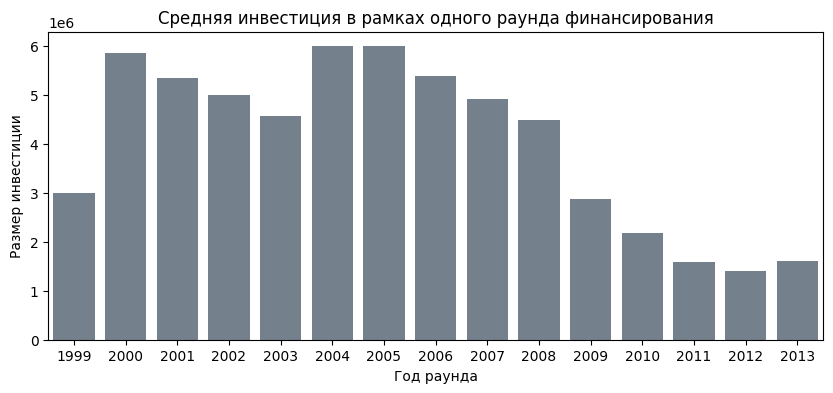

In [36]:
# Создаем гистограмму
plt.figure(figsize=(10,4))

sns.barplot(data=filtered_company_pivot,
             x='funded_at_year', 
             y='median',
             color='slategrey')

plt.title('Средняя инвестиция в рамках одного раунда финансирования')
plt.xlabel('Год раунда')
plt.ylabel('Размер инвестиции')
plt.show()

- Наблюдения по данным
    - Самые максимальные значения собранных в рамках одного раунда средств были в период с 1999 по 2001 год включительно - как раз во время максимального расширения "пузыря доткомов"
    - На поротяжении всех последющих лет наблюдалась тенденция к появлению на порядки большего количества стартапов, чем в начале 2000-х годов, при этом инвестиционная капитализация росла не такими быстрыми темпами и, даже можно сказать, стагнировала вокруг одних и тех же значений, что приводило к еще большему уменьшению среднего вложения в начинающие компании
    - Также на данную тенденцию повлиял кризис 2008 года, совпавший с еще более буйным ростом количества стартапов в последующие годы

<div style="background-color: #a2c4c9; padding: 10px; border-radius: 5px;">

### Люди и их образование

- В датасете отсутствуют 75% данных об окончании образовательный учреждений относительно всех записей о людях, поэтому данный столбец для поиска корреляций не подойдет
- Единственный набор данных по которому можно делать анализ - это столбец `instituition` из `people.csv`. Но даже у него есть нюанс, общий объем данных о людях (сотрудниках) составляет 226709 строк, при этом `instituition` имеет только лишь 109000 записей, то есть меньше половины от всего датасета `people.csv`, поэтому даже к этим данным стоит относиться осторожно.
- Что касается `degrees.csv`, то столбец `degree_type` имеет на 10% больше пропущенных значений чем `instituition` из `people.csv`, а столбец `subject` больше на целых 25%, поэтому эти данные тем более не стоит рассматривать для анализа из-за повышенной вероятности не найти корреляции или найти ошибочную, что еще хуже

In [37]:
# Объединяем исходные датасеты в один общий
edu_people_df = pd.merge(
    people_df,
    education_df, 
    right_on='person_id',
    left_on='id',
    how='outer')

edu_people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268248 entries, 0 to 268247
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                267694 non-null  float64
 1   first_name        267685 non-null  object 
 2   last_name         267690 non-null  object 
 3   company_id        267694 non-null  float64
 4   network_username  50775 non-null   object 
 5   person_id         109610 non-null  float64
 6   instituition      109555 non-null  object 
 7   graduated_at      58054 non-null   object 
dtypes: float64(3), object(5)
memory usage: 16.4+ MB


In [38]:
# Группируем данные о людях по компаниям
group_company_df = edu_people_df['company_id'].value_counts().sort_values(ascending=False).reset_index()

# Оставляем только тех сотрудников, у кого есть идентификатор компании
# Так как "-1" был идентификатором ее отсутствия
group_company_df = group_company_df[group_company_df['company_id'] > 0]

print(group_company_df.info())
group_company_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 22922 entries, 1 to 22922
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company_id  22922 non-null  float64
 1   count       22922 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 537.2 KB
None


,company_id,count
1,59.00,376
2,29.00,221
3,1242.00,192
4,231067.00,111
5,4175.00,89


In [39]:
# Группируем компаний по количеству сотрудников в них
group_company_count_df = group_company_df['count'].value_counts().sort_values(ascending=False)
group_company_count_df.head(10)

count
1     14150
2      4735
3      1857
4       831
5       447
6       259
7       161
8       115
9        86
11       52
Name: count, dtype: int64

- Получаем 22922 строки компаний хотя бы с 1 сотрудником, где самая многочисленная "компания" имеет целых 376 человек
- Более того, компаний, состоящих из 1 человека целых 14000 штук, то есть 2/3 от всех представленных в датасете компаний, это стоит иметь в виду при дальнейшем анализе данных
- Теперь, чтобы понять на сколько когорт по количеству сотрудников делить компании, нужно посмотреть на их распределение на графике

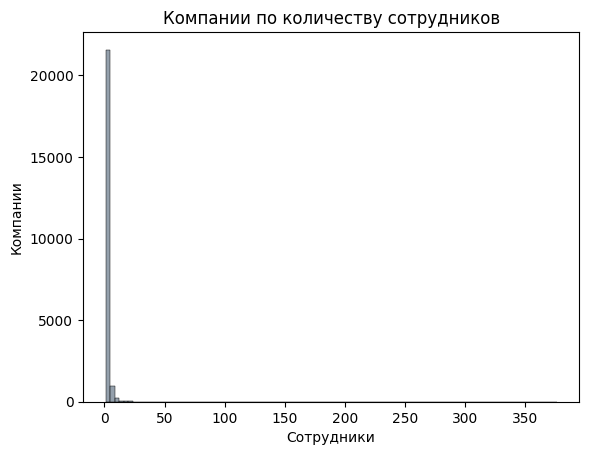

In [41]:
# Создаем гистограмму
sns.histplot(data=group_company_df,
            x='count',
            bins=100,
            color='slategrey')

plt.title('Компании по количеству сотрудников')
plt.xlabel('Сотрудники')
plt.ylabel('Компании')
plt.show()

In [42]:
# Делим на процентили всего объема данных
group_company_df['group'] = pd.qcut(group_company_df['count'], q=25, labels=['1-2', '2-3', '3-4', '4-5', '4-376'], duplicates='drop')
group_company_df['group'].unique()

['4-376', '4-5', '3-4', '2-3', '1-2']
Categories (5, object): ['1-2' < '2-3' < '3-4' < '4-5' < '4-376']

In [43]:
group_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22922 entries, 1 to 22922
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   company_id  22922 non-null  float64 
 1   count       22922 non-null  int64   
 2   group       22922 non-null  category
dtypes: category(1), float64(1), int64(1)
memory usage: 559.8 KB


In [44]:
# Создаем датафрейм с итоговым количеством сотрудников по когортам компаний
full_info = group_company_df.groupby('group')['count'].sum()
pd.DataFrame(full_info)

,count
group,
1-2,23620
2-3,5571
3-4,3324
4-5,2235
4-376,10039


In [45]:
# Объединяем датасеты в один общий, но с данными о когортах
relation_edu_people_df = pd.merge(
    edu_people_df, 
    group_company_df, 
    on='company_id',
    how='inner')

relation_edu_people_df['group'].unique()

['1-2', '2-3', '4-5', '4-376', '3-4']
Categories (5, object): ['1-2' < '2-3' < '3-4' < '4-5' < '4-376']

In [46]:
# Создаем новый столбец, определяющий наличие или отсутствие информации об образовании в строке 
relation_edu_people_df['missing_education'] = relation_edu_people_df['instituition'].isna()

In [47]:
# Создаем датафрейм с суммой отсутствующих значений по когортам
missing_info = relation_edu_people_df.groupby('group')['missing_education'].sum()
pd.DataFrame(missing_info)

,missing_education
group,
1-2,10542
2-3,1272
3-4,889
4-5,654
4-376,2823


In [48]:
# Объединяем датафреймы и считаем соотношение пропуск/всего
ratio_df = pd.merge(missing_info, full_info, on='group')

ratio_df['ratio'] = ratio_df['missing_education'] / ratio_df['count']

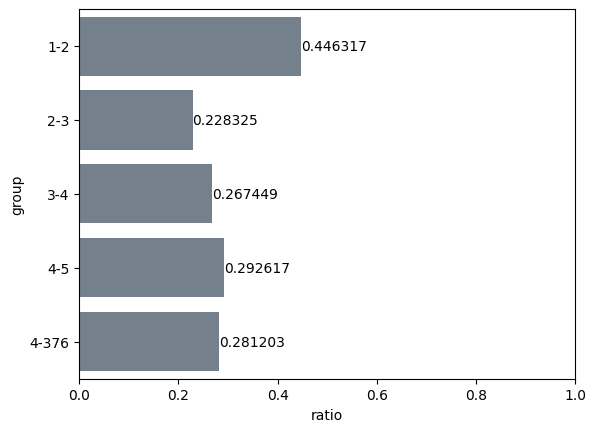

In [49]:
# Визуализируем эти данные
ax = sns.barplot(data=ratio_df,
            orient='h',
            y='group',
            x='ratio',
            color='slategrey')

plt.xlim(0, 1)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

- Границы групп были выбраны с учётом распределения числа сотрудников, чтобы обеспечить репрезентативность каждой категории. Выбор границ обусловлен необходимостью выделения групп с приблизительно равномерным распределением числа компаний, а также минимизацией искажения данных в случае наличия компаний с сильно различающимся числом сотрудников

- На основе анализа были рассчитаны средние значения доли сотрудников без данных об образовании для каждой из выделенных групп:
    - Для группы (1-2): средняя доля составила 44.6 %.
    - Для группы (2-3): средняя доля составила 22.8 %.
    - Для группы (3-4): средняя доля составила 26.7 %.
    - Для группы (4-5): средняя доля составила 29.2 %.
    - Для группы (4-376): средняя доля составила 28.1%.

In [50]:
# Объединяем наш датафрейм с новой таблицей данных в degrees.csv
relation_degree = pd.merge(relation_edu_people_df, 
                                      degrees_df, 
                                      right_on='object_id', 
                                      left_on='id',
                                      how='inner')
print(relation_degree.info())
relation_degree.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54718 entries, 0 to 54717
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id_x               54718 non-null  float64 
 1   first_name         54718 non-null  object  
 2   last_name          54718 non-null  object  
 3   company_id         54718 non-null  float64 
 4   network_username   30763 non-null  object  
 5   person_id          54718 non-null  float64 
 6   instituition       54670 non-null  object  
 7   graduated_at       40052 non-null  object  
 8   count              54718 non-null  int64   
 9   group              54718 non-null  category
 10  missing_education  54718 non-null  bool    
 11  id_y               54718 non-null  int32   
 12  object_id          54718 non-null  int32   
 13  degree_type        48950 non-null  object  
 14  subject            44165 non-null  object  
dtypes: bool(1), category(1), float64(3), int32(2), int64(

,id_x,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at,count,group,missing_education,id_y,object_id,degree_type,subject
0,2.00,Ben,Elowitz,4993.00,elowitz,2.00,"University of California, Berkeley",1994-01-01,2,1-2,False,699,2,BS,Electrical Engineering/Computer Science
1,2.00,Ben,Elowitz,4993.00,elowitz,2.00,"University of California, Berkeley",1994-01-01,2,1-2,False,700,2,BS,Applied Mathematics
2,2.00,Ben,Elowitz,4993.00,elowitz,2.00,"University of California, Berkeley",1994-01-01,2,1-2,False,699,2,BS,Electrical Engineering/Computer Science
3,2.00,Ben,Elowitz,4993.00,elowitz,2.00,"University of California, Berkeley",1994-01-01,2,1-2,False,700,2,BS,Applied Mathematics
4,3.00,Kevin,Flaherty,1.00,NaN,3.00,Washington University in St Louis,NaN,3,2-3,False,706,3,BBA,NaN


In [51]:
# Создаем новый столбец, определяющий наличие или отсутствие информации о типе образования в строке 
relation_degree['missing_degree'] = relation_degree['degree_type'].isna()

In [52]:
# Создаем датафрейм с суммой отсутствующих значений по когортам
missing_degree_info = relation_degree.groupby('group')['missing_degree'].sum()
pd.DataFrame(missing_degree_info)

,missing_degree
group,
1-2,1931
2-3,1125
3-4,679
4-5,444
4-376,1589


In [53]:
# Объединяем датафреймы и считаем соотношение пропуск/всего
ratio_degree_df = pd.merge(missing_degree_info, full_info, on='group')

ratio_degree_df['ratio'] = ratio_degree_df['missing_degree'] / ratio_degree_df['count']

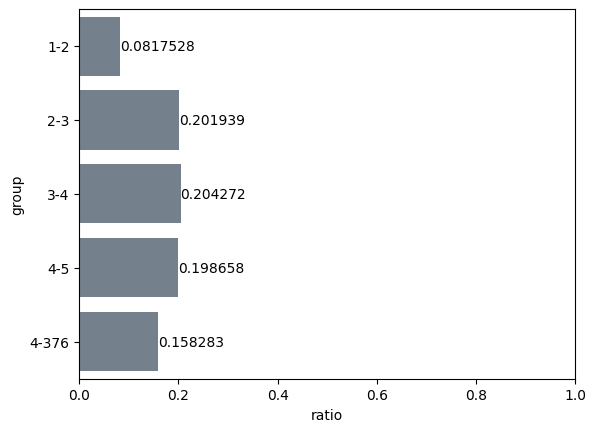

In [54]:
# Визуализируем эти данные
ax = sns.barplot(data=ratio_degree_df,
            orient='h',
            y='group',
            x='ratio',
            color='slategrey')

plt.xlim(0, 1)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

- При присоеденении датафрейма `degrees.csv` видим уменьшение процента пропущенных значений на основе столбца `degree_type`, который обозначает тип полученного образования
- Особенно сильно и разительно отличается группа компаний, где указан сотрудником-основателем только 1 человек. Здесь разница в отсутствии данных составляет сначала 44%, а теперь всего 8%
- Таким образом, да, таблицу `degrees.csv` можно использовать для анализа пропущенных значений, а также того, зависит ли полнота сведений о сотрудниках от размера компаний

<div style="background-color: #a2c4c9; padding: 10px; border-radius: 5px;">

### Объединять или не объединять — вот в чём вопрос

- Столбец `network_username` существует в 3 разных датасетах, но означает абсолютно разные сущности:
   - В датасете `people.csv` - никнейм человека в сети
   - В датасете `company_and_rounds` - ник компании в сети
   - В датасете `fund` - ник фонда в сети
- Соответственно, на их основе невозможно объединять никакие датасеты из представленных

In [55]:
# Создаем множества значений по network_username, сразу избавляясь от пропущенных значений и дубликатов
people_nick = set(people_df['network_username'])
company_nick = set(company_df['network_username'])
fund_nick = set(fund_df['network_username'])

In [56]:
# Находим пересечения между множествами
people_and_company = people_nick & company_nick
people_and_fund = people_nick & fund_nick
company_and_fund = company_nick & fund_nick

In [57]:
#Выводим информацию о пересечениях
print(f'Всего пересечений между people_df и company_df = {len(people_and_company)}')
print()
print(f'Всего пересечений между people_df и fund_df = {len(people_and_fund)}')
print()
print(f'Всего пересечений между company_df и fund_df = {len(company_and_fund)}')

Всего пересечений между people_df и company_df = 2200

Всего пересечений между people_df и fund_df = 80

Всего пересечений между company_df и fund_df = 71


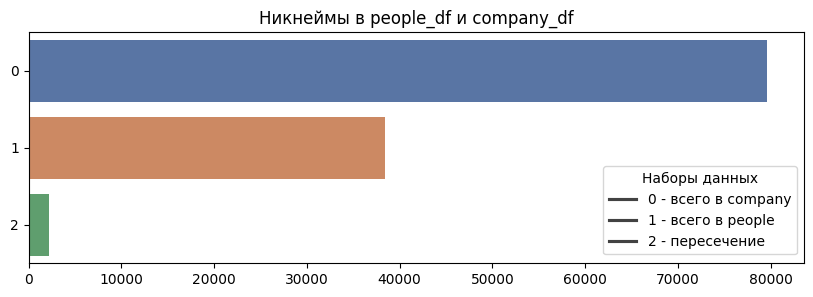

In [58]:
# Визуализируем эти масштабы
plt.figure(figsize=(10,3))

sns.barplot(data=(len(company_nick), len(people_nick), len(people_and_company)),
           palette='deep',
           orient='h')

plt.legend(labels=['0 - всего в company', '1 - всего в people', '2 - пересечение'],
          title='Наборы данных',
          bbox_to_anchor=(1, 0.45))

plt.title('Никнеймы в people_df и company_df')
plt.show()

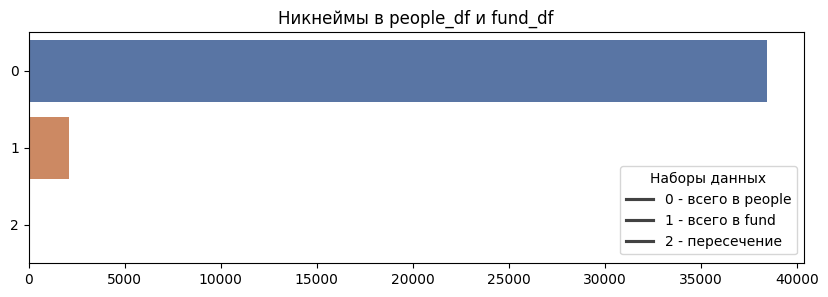

In [59]:
plt.figure(figsize=(10,3))

sns.barplot(data=(len(people_nick), len(fund_nick), len(people_and_fund)),
           palette='deep',
           orient='h')

plt.legend(labels=['0 - всего в people', '1 - всего в fund', '2 - пересечение'],
          title='Наборы данных',
          bbox_to_anchor=(1,0.45))

plt.title('Никнеймы в people_df и fund_df')
plt.show()

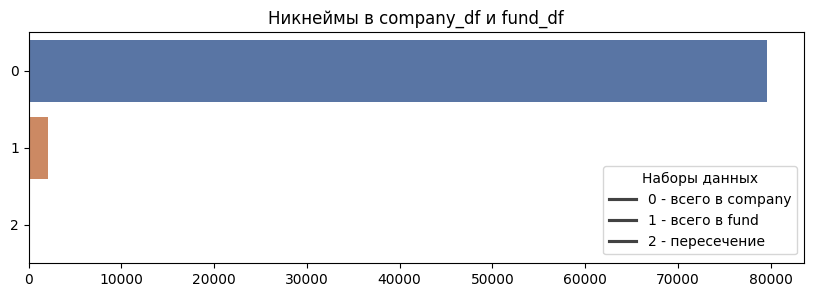

In [60]:
plt.figure(figsize=(10,3))

sns.barplot(data=(len(company_nick), len(fund_nick), len(company_and_fund)),
           palette='deep',
           orient='h')

plt.legend(labels=['0 - всего в company', '1 - всего в fund', '2 - пересечение'],
          title='Наборы данных',
          bbox_to_anchor=(1,0.45))

plt.title('Никнеймы в company_df и fund_df')
plt.show()

- Как итог, мало того, что данный столбец означает абсолютно разные вещи в разных датасетах, к тому же и пересечений между этими данными почти нет
- Разве что можно обратить внимание на такую тенденцию, что никнеймы совпадают между названием компании и человеком, возможно по причине тех случаев, когда это единственный сотрудник в компании и он же ее основатель, а значит ему имеет смысл брать одинаковые никнеймы для продвижения в сети

<div style="background-color: #a2c4c9; padding: 10px; border-radius: 5px;">

### Проблемный датасет и причина возникновения пропусков

- Повторно взглянем на данные нашего проблемного датасета `company_and_rounds.csv`

- Что уже было сделано:
    - Числовые столбцы с 13 по 21 приведены к эффективному формату данных, а также заменены пропуски на невозможное для данных столбцов значение "-1"
    - Также все NaN значения столбца `funded_at_year` заменены на невозможное, но в формате года от даты значение "0"
    - Столбцы, связанные со временем были приведены к временному типу данных

- Что остается сделать
    - Выделить данные о раундах в отдельный датафрейм для удобства будущей работы
    - Заполнить все пропуски невозможным значением, например `unknown'
    - Добавить несколько агрегированных столбцов для более быстрой работы по конкретным компаниям без лишних математических калькуляций

In [61]:
# Заполняем пропуски
company_df['country_code'].fillna('unknown', inplace=True)
company_df['name'].fillna('unknown', inplace=True)
company_df['category_code'].fillna('unknown', inplace=True)
company_df['funding_round_type'].fillna('unknown', inplace=True)
company_df['status'].fillna('unknown', inplace=True)
company_df['domain'].fillna('unknown', inplace=True)
company_df['network_username'].fillna('unknown', inplace=True)
company_df['country_code'].fillna('unknown', inplace=True)

In [62]:
# Добавляем агрегированные столбцы
company_df['total_rounds'] = company_df.groupby('company_id')['funding_round_id'].transform('count')
company_df['total_raised'] = company_df.groupby('company_id')['raised_amount'].transform('sum')
company_df['mean_raise'] = company_df.groupby('company_id')['raised_amount'].transform('mean')

In [63]:
# Создаем отдельный датасет только с информацией о компаниях и агрегированные данные по раундам по каждой из них
company_only_df = company_df[['company_id',
                              'name',
                              'category_code',
                              'status',
                              'founded_at',
                              'closed_at',
                              'domain',
                              'network_username',
                              'country_code',
                              'milestones',
                              'total_rounds',
                              'total_raised',
                              'mean_raise']]
company_only_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,milestones,total_rounds,total_raised,mean_raise
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,5,3,39750000,13250000.00
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,5,3,39750000,13250000.00
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,5,3,39750000,13250000.00
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,unknown,USA,0,1,-1,-1.00
4,100,There,games_video,acquired,NaT,NaT,there.com,unknown,USA,4,1,-1,-1.00


In [64]:
# Создаем еще один датасет, который содержит только данные по раундам компаний
rounds_only_df = company_df[['company_id',
                             'name',
                             'status',
                             'funding_round_id',
                             'investment_rounds',
                             'funding_rounds',
                             'funded_at',
                             'funding_round_type',
                             'raised_amount',
                             'pre_money_valuation',
                             'participants',
                             'is_first_round',
                             'is_last_round',
                             'funded_at_year',
                             'total_rounds',
                             'total_raised',
                             'mean_raise']]
rounds_only_df.head()

,company_id,name,status,funding_round_id,investment_rounds,funding_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year,total_rounds,total_raised,mean_raise
0,1,Wetpaint,operating,888,0,3,2005-10-01,series-a,5250000,0,2,0,1,2005,3,39750000,13250000.00
1,1,Wetpaint,operating,889,0,3,2007-01-01,series-b,9500000,0,3,0,0,2007,3,39750000,13250000.00
2,1,Wetpaint,operating,2312,0,3,2008-05-19,series-c+,25000000,0,4,1,0,2008,3,39750000,13250000.00
3,10,Flektor,acquired,-1,0,0,NaT,unknown,-1,-1,-1,-1,-1,0,1,-1,-1.00
4,100,There,acquired,-1,0,0,NaT,unknown,-1,-1,-1,-1,-1,0,1,-1,-1.00


<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

### Промежуточные выводы



    Раунды финансирования по годам:
        Самые максимальные значения собранных в рамках одного раунда средств были в период с 1999 по 2001 год включительно - как раз во время максимального расширения "пузыря доткомов
        В 2013 году наблюдалось постепенное увеличение количества стартапов, при этом средний размер привлечения инвестиций уменьшался из-за стагнации объема инвестиций на рынке.

    Люди и их образование:
        Средняя доля сотрудников без информации об образовании была оценена для различных групп компаний.
        Данные таблицы `degrees.csv` полезны для поиска соотношения пропущенных и заполненных значений 
        
    Объединение данных:
        Столбец network_username не подходит для объединения данных из-за обозначения разных идентификаторов для разных субъектов рынка.

    Проблемный датасет:
        В датасете company_and_rounds.csv выявлены значительные пропуски в информации о раундах финансирования.
        Пропуски заполнены, созданы столбцы с агрегированной информацией о раундах по каждой компании.
        Данные о компаниях и об их раундах финансирования выделены в 2 различные таблицы для более удобной работы с ними


<div style="background-color: #76a5af; padding: 10px; border-radius: 5px;">

## Исследовательский анализ объединённых таблиц

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

### Объединение данных и анализ выбросов

- Создаем новый датасет данных о компаниях, которые меняли или готовы менять владельцев

In [65]:
# Фильтруем данные, отрезая пустые неинформативные строки, которые будут бесполезны для нашего анализа 
active_company_df = company_df[
    ((company_df['funding_rounds'] > 0) | 
    (company_df['investment_rounds'] > 0) | 
    (company_df['status'] == 'acquired')) &
    (company_df['funded_at_year'] > 0) &
    (company_df['raised_amount'] > 0) &
    (company_df['founded_at'].notna())]

active_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38467 entries, 0 to 217471
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           38467 non-null  int32         
 1   name                 38467 non-null  object        
 2   category_code        38467 non-null  object        
 3   status               38467 non-null  object        
 4   founded_at           38467 non-null  datetime64[ns]
 5   closed_at            1931 non-null   datetime64[ns]
 6   domain               38467 non-null  object        
 7   network_username     38467 non-null  object        
 8   country_code         38467 non-null  object        
 9   investment_rounds    38467 non-null  int16         
 10  funding_rounds       38467 non-null  int8          
 11  funding_total        38467 non-null  int64         
 12  milestones           38467 non-null  int8          
 13  funding_round_id     38467 non-null

- Визуально определяем типичный итоговый размер финансирования для компании

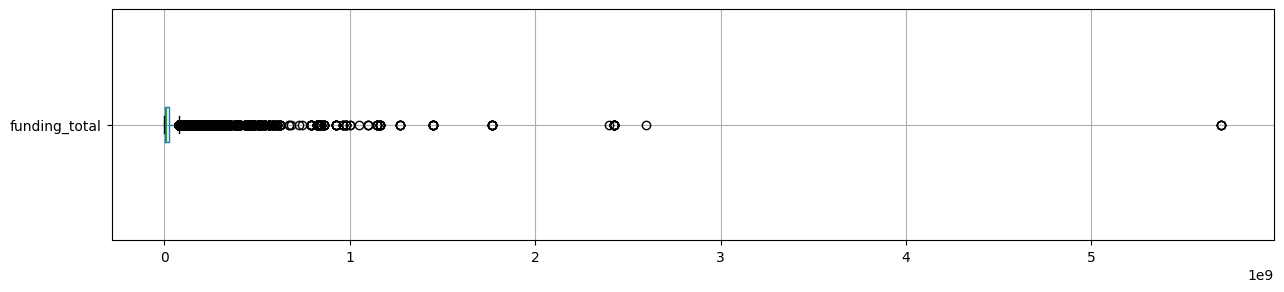

In [66]:
# Визуализируем размах общего инвстирования в компании
plt.figure(figsize=(15,3))

active_company_df.boxplot(column='funding_total',
                         vert=False,
                         whis=2)

plt.show()

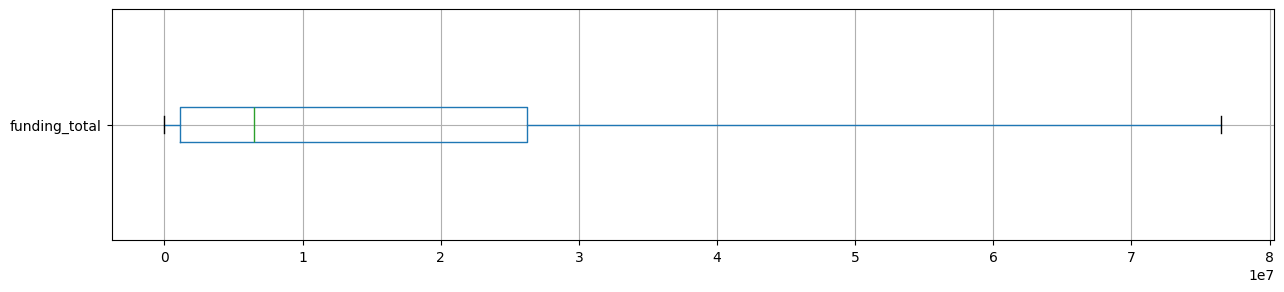

In [67]:
# Визуализируем размах общего инвстирования в компании без выбросов
plt.figure(figsize=(15,3))

active_company_df.boxplot(column='funding_total',
                         vert=False,
                         showfliers=False,
                         whis=2)

plt.show()

In [68]:
percentiles = np.percentile(active_company_df['funding_total'], [50, 75, 90, 99, 99.9])
percentile_labels = ['50%', '75%', '90%', '99%', '99.9']
percentile_colors = ['red', 'orange', 'yellow', 'purple', 'black']

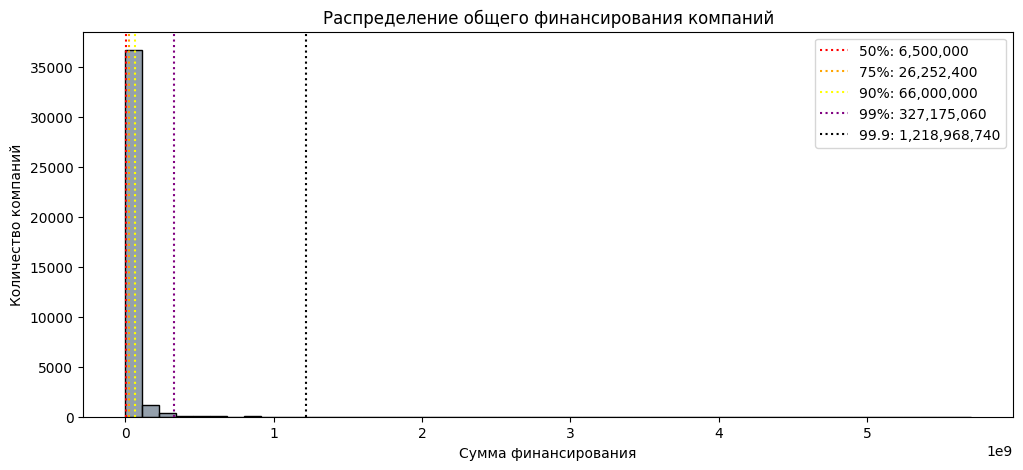

In [69]:
# Визуализируем общее инвстирование в компании на гистограмме распредления значений
plt.figure(figsize=(12,5))

sns.histplot(data=active_company_df, 
             x='funding_total', 
             bins=50,
             color='slategrey')

for percentile, label, color in zip(percentiles, percentile_labels, percentile_colors):
    plt.axvline(percentile, linestyle=':', label=f"{label}: {percentile:,.0f}", color=color)
    
plt.legend()
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')

plt.show()

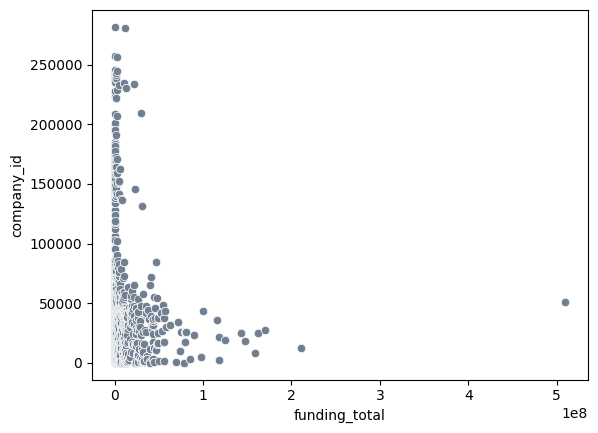

In [70]:
# Группируем по funding_total и считаем количество компаний
agg_df = active_company_df.groupby('funding_total').value_counts().reset_index()

sns.scatterplot(data=agg_df, x='funding_total', y='company_id', color='slategrey')

plt.show()

In [71]:
# Описываем данные
active_company_df['funding_total'].describe()

count        38467.00
mean      29174995.17
std      106079962.23
min            291.00
25%        1100000.00
50%        6500000.00
75%       26252400.00
max     5700000000.00
Name: funding_total, dtype: float64

- Все графики предствляют очень похожую друг на друга картину
- Судя по графикам, мы видим, что с огромным отрывом лидирует среднее значение в районе 100.000.000 долларов США (0.1 * 1e9)
- Но численное описание данных показывает, что медианное значение составляет 6.500.000, а среднее значение 29.174.995, что говорит о большой волатильности и размахе данных, что делает крайне низкой возможность корректного анализа и далекоидущих выводов
- С такими данными необходима дальнейшая обработка и фильтрация для получения релевантных результатов, например, группировка компаний по сферам деятельности для получения искомых данных или средний объем первого инвестирования в группе начинающих стартапов

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

### Куплены забесплатно?

In [72]:
# Создаем новый датафрейм, который состоит из данных о полгощенных компаниях, где сумма покупки составляет 1$ или 0$
zero_df = acq_df[(acq_df['price_amount'] == 1) |
                 (acq_df['price_amount'] == 0)]

In [73]:
# Фильтруем датасет с компаниями, чтобы оставить только поглощенные из них
active_df = active_company_df[active_company_df['status'] == 'acquired']

In [74]:
# Объединям с нашим датафреймом о компаниях по принципу "поглощение-поглощенная компания"
zero_company_df = pd.merge(zero_df, 
                           active_df, 
                           left_on='acquired_company_id', 
                           right_on='company_id', 
                           how='inner')

In [77]:
# Смотрим на верхний размах данных
zero_company_df.nlargest(10, columns='total_raised')

,id,acquiring_company_id,acquired_company_id,price_amount,acquired_at,company_id,name,category_code,status,founded_at,...,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year,total_rounds,total_raised,mean_raise
1512,8023,3827,13219,0,2012-12-17,13219,Clearwire,mobile,acquired,2003-10-01,...,post-ipo,920000000,0,5,0,0,2009,4,5700000000,1425000000.00
1513,8023,3827,13219,0,2012-12-17,13219,Clearwire,mobile,acquired,2003-10-01,...,post-ipo,1500000000,0,6,0,0,2009,4,5700000000,1425000000.00
1514,8023,3827,13219,0,2012-12-17,13219,Clearwire,mobile,acquired,2003-10-01,...,post-ipo,3200000000,0,5,0,1,2008,4,5700000000,1425000000.00
1515,8023,3827,13219,0,2012-12-17,13219,Clearwire,mobile,acquired,2003-10-01,...,private-equity,80000000,0,1,1,0,2013,4,5700000000,1425000000.00
733,5133,28712,68409,0,2011-02-09,68409,Fanatics,ecommerce,acquired,1995-01-01,...,venture,225000000,0,3,0,1,2012,2,395000000,197500000.00
734,5133,28712,68409,0,2011-02-09,68409,Fanatics,ecommerce,acquired,1995-01-01,...,venture,170000000,0,0,1,0,2013,2,395000000,197500000.00
1821,8967,104020,68409,0,2011-06-01,68409,Fanatics,ecommerce,acquired,1995-01-01,...,venture,225000000,0,3,0,1,2012,2,395000000,197500000.00
1822,8967,104020,68409,0,2011-06-01,68409,Fanatics,ecommerce,acquired,1995-01-01,...,venture,170000000,0,0,1,0,2013,2,395000000,197500000.00
2166,9976,272107,36886,0,2007-03-27,36886,Horizon Wind Energy,cleantech,acquired,1998-01-01,...,venture,228000000,0,1,0,1,2009,2,318000000,159000000.00
2167,9976,272107,36886,0,2007-03-27,36886,Horizon Wind Energy,cleantech,acquired,1998-01-01,...,venture,90000000,0,1,1,0,2009,2,318000000,159000000.00


Обращаем внимание на компанию `Clearwire`, которая своими суммами инвестиций скорее всего даст серьезные отклонения

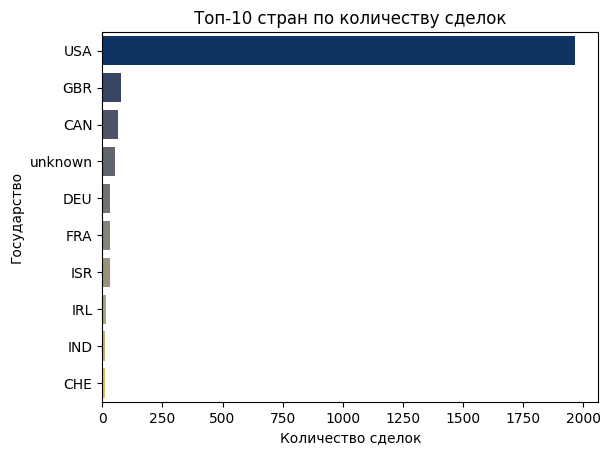

In [78]:
# Визуализируем полгощенные компании по стране их деятельности
country_counts = zero_company_df['country_code'].value_counts().nlargest(10)

sns.barplot(x=country_counts.values, 
            y=country_counts.index, 
            palette='cividis')

plt.title('Топ-10 стран по количеству сделок')
plt.xlabel('Количество сделок')
plt.ylabel('Государство')
plt.show()

Увы, но эти данные были ожидаемы и предсказуемы

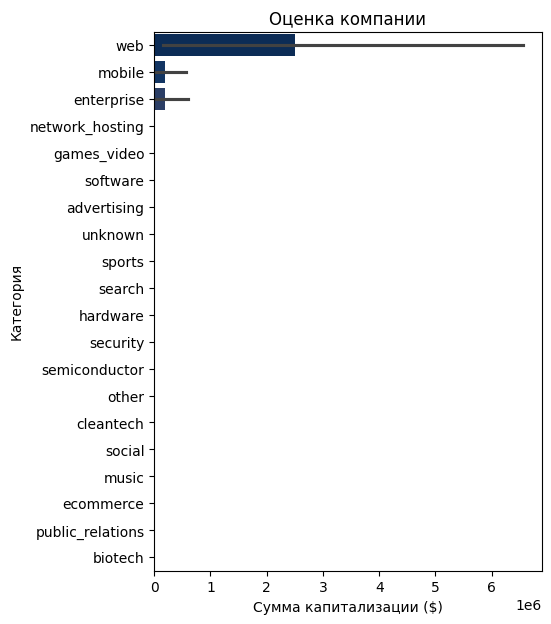

In [79]:
# Визуализируем компании проданные за 0$ по сумме капитализации перед покупкой
pre_value_top = zero_company_df.nlargest(300, columns='pre_money_valuation')

plt.figure(figsize=(5,7))

sns.barplot(orient='h',
            data=pre_value_top,
            x='pre_money_valuation',
            y='category_code',
            palette='cividis')

plt.title('Оценка компании')
plt.xlabel('Сумма капитализации ($)')
plt.ylabel('Категория')
plt.show()

- Видим огромный отрыв `web` отрасли от остальных категорий, учитывая что в категории `mobile` скорее всего большую сумму дает одна вышеупомянутая компания

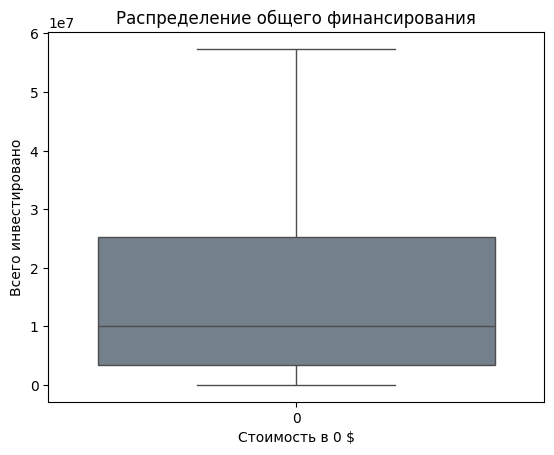

In [80]:
# Визуализируем размах по сумме капитализации перед покупкой относительно средней стоимости
sns.boxplot(data=zero_company_df, 
            x='price_amount', 
            y='funding_total', 
            showfliers=False,
            color='slategrey')

plt.title('Распределение общего финансирования')
plt.xlabel('Стоимость в 0 $')
plt.ylabel('Всего инвестировано')
plt.show()

- Видим те же объемы общего инвестирования в компании, которые проданы за 0$, что и в среднем в датасете
- Это означает, что все остальные компании, кроме web имеют примерно тот же размах и стандратное отклонение

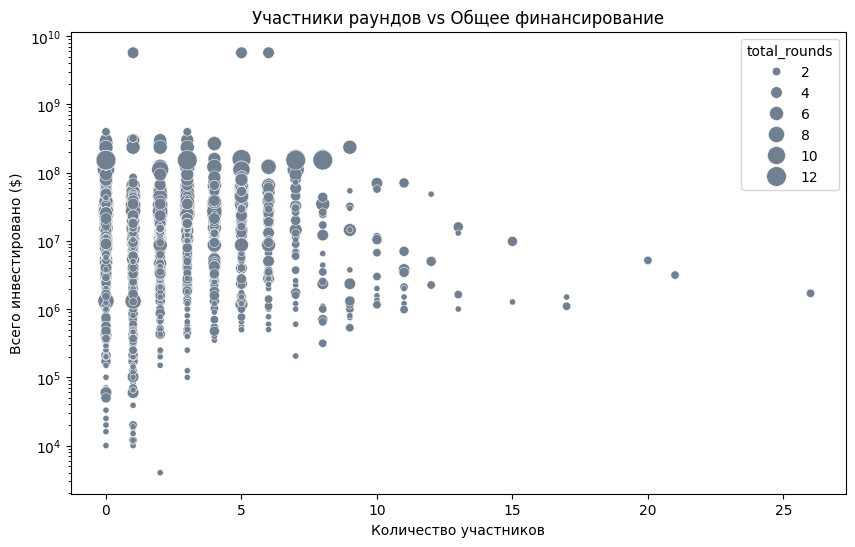

In [81]:
# Визуализируем влияние количества участников на сумму привлеченных инвестиций и раунды спонсирования
# Возможно меньшее количество собственников означает большую вероятность продажи компании, путем вхождения в совет директоров новой компании
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=zero_company_df,
    x='participants',
    y='funding_total',
    color='slategrey',
    size='total_rounds',
    sizes=(20, 200)
)
plt.title('Участники раундов vs Общее финансирование')
plt.xlabel('Количество участников')
plt.ylabel('Всего инвестировано ($)')
plt.yscale('log')
plt.show()

Увы, но каких-либо интересных корреляций не наблюдается

In [82]:
# Посомотрим на соотношение компаний, проданных за 0$ относительно их общего количества в датасете
df_values1 = zero_company_df['category_code'].value_counts().reset_index()
df_values2 = active_company_df['category_code'].value_counts().reset_index()
df_values3 = pd.merge(df_values1, df_values2, on = 'category_code', how='inner')
df_values3['relation'] = df_values3['count_x'] / df_values3['count_y']
df_values3.sort_values(by='relation', ascending=False).head(10)

,category_code,count_x,count_y,relation
9,network_hosting,72,644,0.11
1,web,305,3126,0.10
8,semiconductor,75,771,0.10
16,messaging,30,310,0.10
19,travel,25,282,0.09
0,software,513,5900,0.09
2,enterprise,219,2676,0.08
5,games_video,126,1562,0.08
4,advertising,146,1888,0.08
3,mobile,215,2790,0.08


-  Здесь ситуация куда интереснее, мы снова видим IT сферу и наш web, но, увы, все эти данные лежат примерно в одной и той же плоскости 10% от общей массы данных. Просто из-за большей доли именно web компаний в выборке, они оказывют куда большее влияние на итоговые графики, чем схожие по проценту другие отрасли

Посмотрим внимательнее на сами `web` компании

In [83]:
# Выделяем web компании в отдельный датафрейм
web_df = zero_company_df[zero_company_df['category_code'] == 'web']
web_df.describe()

,id,acquiring_company_id,acquired_company_id,price_amount,acquired_at,company_id,founded_at,closed_at,investment_rounds,funding_rounds,...,funded_at,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year,total_rounds,total_raised,mean_raise
count,305.00,305.00,305.00,305.00,305,305.00,305,3,305.00,305.00,...,305,305.00,305.00,305.00,305.00,305.00,305.00,305.00,305.00,305.00
mean,5847.56,29979.55,19813.23,0.00,2011-03-27 06:27:08.852459008,19813.23,2006-04-19 21:28:55.081967232,2009-01-02 16:00:00,0.03,2.54,...,2008-06-26 23:36:23.606557440,5134634.79,443278.69,2.67,0.56,0.53,2008.05,2.54,15711046.75,4903460.49
min,14.00,5.00,9.00,0.00,2005-03-11 00:00:00,9.00,1995-01-01 00:00:00,2008-10-02 00:00:00,0.00,1.00,...,1999-01-01 00:00:00,10000.00,0.00,0.00,0.00,0.00,1999.00,1.00,10000.00,10000.00
25%,4265.00,608.00,867.00,0.00,2010-01-07 00:00:00,867.00,2005-01-01 00:00:00,2008-12-10 12:00:00,0.00,1.00,...,2007-02-01 00:00:00,775000.00,0.00,1.00,0.00,0.00,2007.00,1.00,1915000.00,1025000.00
50%,6368.00,4861.00,4453.00,0.00,2011-05-23 00:00:00,4453.00,2006-10-01 00:00:00,2009-02-18 00:00:00,0.00,2.00,...,2008-04-18 00:00:00,2500000.00,0.00,2.00,1.00,1.00,2008.00,2.00,5600000.00,2750000.00
75%,8046.00,33965.00,34298.00,0.00,2012-09-01 00:00:00,34298.00,2008-01-01 00:00:00,2009-02-18 00:00:00,0.00,3.00,...,2010-03-31 00:00:00,5672660.00,0.00,3.00,1.00,1.00,2010.00,3.00,16000000.00,5500000.00
max,10452.00,269309.00,169940.00,0.00,2013-12-04 00:00:00,169940.00,2013-02-05 00:00:00,2009-02-18 00:00:00,1.00,7.00,...,2013-11-04 00:00:00,150000000.00,100000000.00,21.00,1.00,1.00,2013.00,7.00,299500000.00,59900000.00
std,2759.87,54029.99,29564.32,0.00,NaN,29564.32,NaN,NaN,0.18,1.50,...,NaN,11535162.48,5841775.80,2.88,0.50,0.50,2.42,1.50,39074481.61,8484122.88


Видим огромную разницу между 3 квартилем и максимальным значением 

In [84]:
# Смотрим на топ самых капитализированных компаний в web
web_df.nlargest(10, columns='total_raised') 

,id,acquiring_company_id,acquired_company_id,price_amount,acquired_at,company_id,name,category_code,status,founded_at,...,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year,total_rounds,total_raised,mean_raise
612,4468,36920,36920,0,2010-12-02,36920,"RetailMeNot, Inc.",web,acquired,2007-05-01,...,series-a,28500000,0,1,0,0,2009,5,299500000,59900000.00
613,4468,36920,36920,0,2010-12-02,36920,"RetailMeNot, Inc.",web,acquired,2007-05-01,...,series-a,90000000,0,3,0,0,2010,5,299500000,59900000.00
614,4468,36920,36920,0,2010-12-02,36920,"RetailMeNot, Inc.",web,acquired,2007-05-01,...,series-c+,10000000,0,1,0,0,2011,5,299500000,59900000.00
615,4468,36920,36920,0,2010-12-02,36920,"RetailMeNot, Inc.",web,acquired,2007-05-01,...,venture,150000000,0,2,1,0,2011,5,299500000,59900000.00
616,4468,36920,36920,0,2010-12-02,36920,"RetailMeNot, Inc.",web,acquired,2007-05-01,...,series-a,21000000,0,0,0,1,2009,5,299500000,59900000.00
2114,9913,3407,6048,0,2008-12-29,6048,Sylantro,web,acquired,1998-01-01,...,series-c+,11000000,0,0,1,0,2006,3,70500000,23500000.00
2115,9913,3407,6048,0,2008-12-29,6048,Sylantro,web,acquired,1998-01-01,...,series-c+,4500000,0,1,0,0,2003,3,70500000,23500000.00
2116,9913,3407,6048,0,2008-12-29,6048,Sylantro,web,acquired,1998-01-01,...,series-c+,55000000,0,11,0,1,2000,3,70500000,23500000.00
446,3554,59,144,0,2010-07-16,144,Metaweb Technologies,web,acquired,2005-01-01,...,series-b,42000000,0,4,1,0,2008,2,57000000,28500000.00
447,3554,59,144,0,2010-07-16,144,Metaweb Technologies,web,acquired,2005-01-01,...,series-a,15000000,0,3,0,1,2006,2,57000000,28500000.00


И понимаем, что такую разницу дает всего лишь одна компания, увы

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и укажем, каким процентилям границы это соответствует.

In [86]:
funding_col = zero_company_df['funding_total']

# Находим медиану
median_funding = funding_col.median()

# Рассчитываем квантили
Q1 = zero_company_df['funding_total'].quantile(0.25)
Q3 = zero_company_df['funding_total'].quantile(0.75)

# Рассчитываем размах
IQR = Q3 - Q1

# Границы выбросов берем по умолчанию в 1.5
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR

In [87]:
# Рассчитываем каким процентилям границы соответствует нижняя граница 
percentileofscore(zero_company_df['funding_total'], lower_edge, kind='rank')

np.float64(0.0)

Нижняя граница включает в себя все самые маленькие данные - это означает, что верхняя граница слишком высока по сравнению с нижней относительно медианы

In [88]:
# Рассчитываем каким процентилям границы соответствует верхняя граница
100 - percentileofscore(zero_company_df['funding_total'], upper_edge, kind='rank')

np.float64(7.727845443091127)

Верхняя граница выше 92% данных или 7% с конца выборки, то есть верхняя граница в данном случае немного ниже "обычных" значений для фильтрации - 95% и выше

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

### Цены стартапов по категориям

Среди категорий стартапов выделим категории стартапов, характеризующиеся наибольшими типичными ценами и наибольшим разбросом цен за стартап.

In [90]:
# Объединяем датасет поглощенных компаний с объединенным качественным датасетом о компаниях
merged_companies_df = pd.merge(acq_df,
                                active_company_df, 
                                left_on='acquired_company_id', 
                                right_on='company_id', 
                                how='inner')

In [91]:
# Отсекаем компании с 0 стоимостью продажи
merged_companies_df = merged_companies_df[merged_companies_df['price_amount'] > 0]

In [92]:
# Находим количество уникальных категорий для обработки
merged_companies_df['category_code'].nunique()

34

In [93]:
# Создаем сводную таблицу с категориями и средним значением цены покупки по каждой из них для ускорения работы с датасетом
pivot_median_price = pd.pivot_table(merged_companies_df,
                                  index='category_code',
                                  values='price_amount',
                                  aggfunc='median')

# Сортируем
pivot_median_price.sort_values(by='price_amount', ascending=False, inplace=True)
pivot_median_price.head(20)

,price_amount
category_code,
transportation,1100000000.00
ecommerce,332500000.00
biotech,302715000.00
medical,300000000.00
consulting,295000000.00
fashion,270000000.00
analytics,200000000.00
unknown,177000000.00
finance,170000000.00


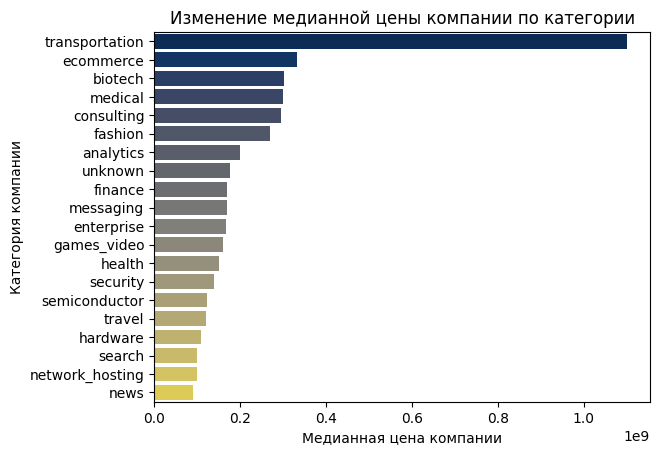

In [94]:
# Делаем визуализацию только по половине данных, так как все остальные категории очень малозначительны в выборке
sns.barplot(data=pivot_median_price.head(20),
            x='price_amount',
            y='category_code',
            palette='cividis')

plt.title('Изменение медианной цены компании по категории')
plt.xlabel('Медианная цена компании')
plt.ylabel('Категория компании')
plt.show()

- Самые высокие медианные цены компаний у категорий
    - `transportation` (1.1 миллиард) 
    - `biotech` (411 миллионов)
    - `ecommerce` (332 миллиона)
    - `medical` (300 миллионов)
    - `consulting` (295 миллионов)
    - `fashion` (270 миллионов)

In [95]:
ranges = merged_companies_df.groupby('category_code')['price_amount'].std().sort_values(ascending=False).reset_index()
ranges

,category_code,price_amount
0,software,1339431586.89
1,semiconductor,1004461547.48
2,finance,594736700.27
3,public_relations,510280678.21
4,photo_video,411013977.66
5,network_hosting,403567133.97
6,enterprise,388618564.77
7,biotech,383877029.83
8,web,371904635.31
9,games_video,339966443.42


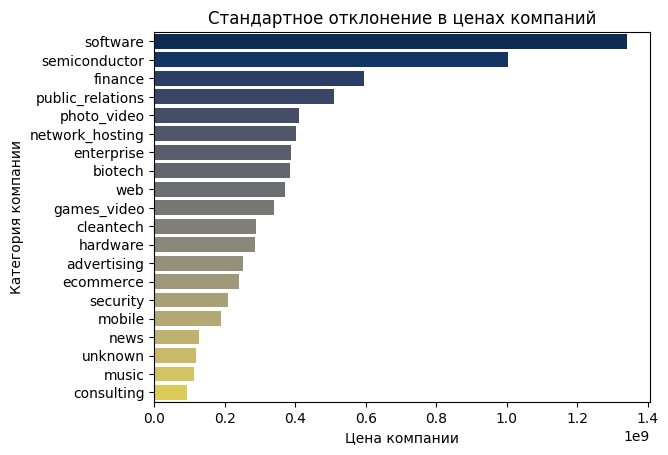

In [96]:
sns.barplot(data=ranges.head(20),
            x='price_amount',
            y='category_code',
            orient='h',
            palette='cividis')

plt.title('Стандартное отклонение в ценах компаний')
plt.xlabel('Цена компании')
plt.ylabel('Категория компании')
plt.show()

- Видим, что самое большое стандартное отклонение в покупной стоимости компании существует в категориях:
    - `software` (1.3 миллиардов) 
    - `semiconductor` (1 миллиард) 
    - `finance` (600 миллионов) 
    - `public_relations` (510 миллионов)

    Мини-вывод по ценам компаний перед продажей:

Лидеры:
- Transportation — высокая стоимость связана с капиталоемкостью инфраструктурных проектов и технологий (автономный транспорт, логистика).
- Software и Finance  — доминирование IT и финтеха, что отражает высокий спрос на цифровые решения и платежные системы, но данная ниша крайне конкурентна
- Semiconductor и Biotech — инвестиции в R&D и патентные технологии увеличивают стоимость с огромной (10-15 лет) окупаемостью

Средний сегмент:
- Ecommerce, Fashion, Games Video — стабильный спрос, но высокая конкуренция, консервативный способ заработка
- Hardware и PhotoVideo — нишевые рынки с медленным потенциалом масштабирования.

Нижние позиции:
- Consulting, PublicRelations, Cleantech — низкая капитализация из-за меньшей технологической глубины.
- Security — несмотря на актуальность, рынок фрагментирован и требует длительных инвестиций.

<div style="background-color: #d0e0e3; padding: 10px; border-radius: 5px;">

### Сколько раундов продержится стартап перед покупкой

In [97]:
# Получаем общую информацию о столбце
print(active_company_df['funding_rounds'].unique())
active_company_df['funding_rounds'].describe()

[ 3  1  5  2  7  4  6  8 10  9 13 11 15 14 12]


count   38467.00
mean        2.79
std         1.99
min         1.00
25%         1.00
50%         2.00
75%         4.00
max        15.00
Name: funding_rounds, dtype: float64

In [98]:
# Группируем данные по статусам и считаем среднее количество раундов
grouped_rounds = active_company_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)
grouped_rounds

status
ipo         4.85
acquired    2.91
operating   2.76
closed      2.05
Name: funding_rounds, dtype: float64

<Axes: xlabel='status', ylabel='funding_rounds'>

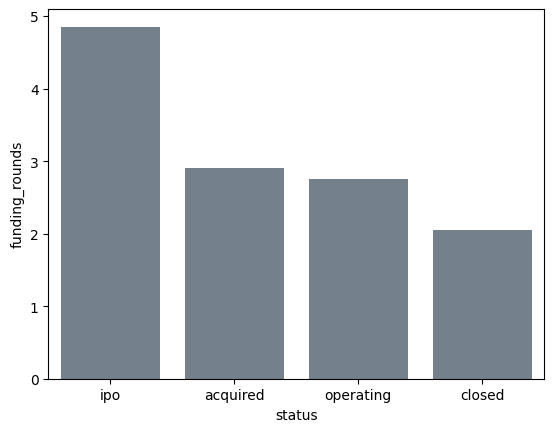

In [99]:
# Визуализируем вышеоформленную таблицу
sns.barplot(data=grouped_rounds,
            color='slategrey')

**Анализ взаимосвязи раундов финансирования и судьбы стартапов:**  

- **Риск закрытия:**  
   Компании, привлекающие **менее 2 раундов инвестиций**, демонстрируют повышенную уязвимость — в большинстве случаев они прекращают деятельность. Это указывает на недостаток ресурсов для масштабирования или проверки рынком данной бизнес-модели.  
- **Путь к поглощению:**  
   Стартапы, достигшие **~3 раундов финансирования**, чаще становятся объектами поглощения крупными игроками. Это говорит о том, что устойчивая финансовая история и рост делают их привлекательными для стратегических приобретений.  
- **Дорога к IPO:**  
   Выход на публичный рынок требует **в среднем 5 раундов инвестиций**. Такие компании проходят длительный этап валидации, наращивания капитализации и подготовки к требованиям биржевых площадок.  
- **Текущие игроки рынка:**  
   Действующие стартапы балансируют между рисками и успехом — их среднее количество раундов (**2.76**) находится **между показателями закрывшихся компаний (≤2)** и **поглощенных (≥3)**. Это подчеркивает, что даже при частичной устойчивости, отсутствие прогресса к новым раундам может замедлить их развитие.  

Количество раундов финансирования служит не только индикатором жизнеспособности стартапа, но и «дорожной картой» его будущего: от риска закрытия — через поглощение — к IPO. Успешные компании преодолевают «критическую массу» инвестиций, что открывает им путь к следующим этапам роста.

In [100]:
category_grouped_rounds = active_company_df.groupby('category_code')['funding_rounds'].mean().sort_values(ascending=False)
category_grouped_rounds

category_code
nanotech           4.36
automotive         4.11
cleantech          3.71
semiconductor      3.64
medical            3.50
transportation     3.30
biotech            3.19
enterprise         3.15
manufacturing      3.14
analytics          3.07
advertising        3.05
network_hosting    3.03
security           2.95
finance            2.95
music              2.83
messaging          2.80
news               2.77
mobile             2.74
hardware           2.74
search             2.63
social             2.61
consulting         2.59
software           2.58
travel             2.50
nonprofit          2.50
education          2.49
ecommerce          2.48
legal              2.47
health             2.45
games_video        2.43
design             2.33
web                2.32
real_estate        2.31
fashion            2.27
photo_video        2.23
hospitality        2.13
sports             2.08
other              1.97
pets               1.88
public_relations   1.75
unknown            1.54
lo

<Axes: xlabel='funding_rounds', ylabel='category_code'>

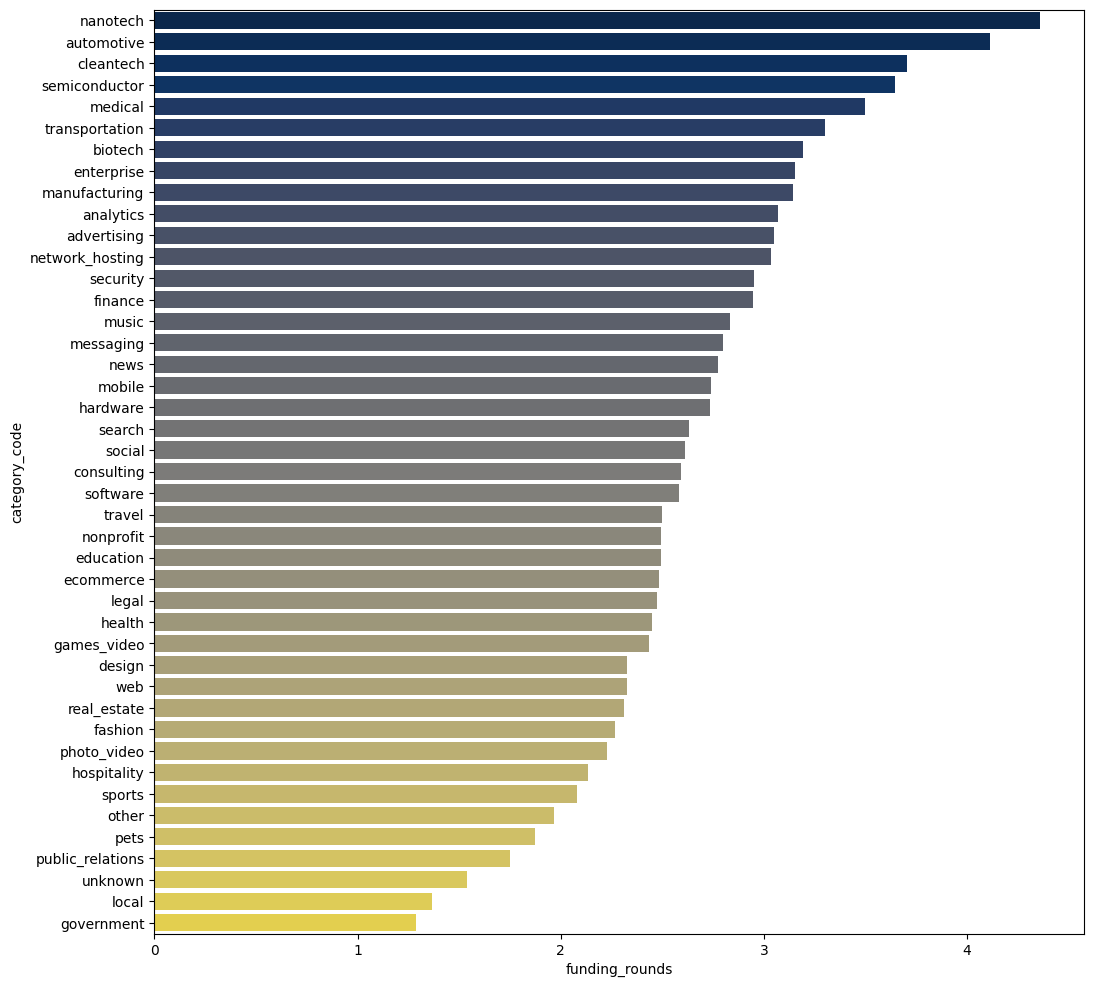

In [101]:
# Визуализируем вышеоформленную таблицу
plt.figure(figsize=(12,12))

sns.barplot(data=category_grouped_rounds,
            palette='cividis',
            orient='h')

Выводы по среднему количеству раундов финансирования стартапов в разных категориях:

1. **Наукоемкие и высокотехнологичные отрасли лидируют по числу раундов:**  
   Категории `nanotech (4.36)`, `automotive (4.11)`, `cleantech (3.71)`, `semiconductor (3.64)`и `medical (3.50)`требуют наибольшего количества раундов. Это связано с длительными циклами R&D, высокими затратами на разработку, необходимостью сертификации (например, в медицине) и капиталоемкостью производства (полупроводники, автомобилестроение).

2. **Регуляторные барьеры увеличивают потребность в финансировании:**  
   Отрасли с жестким регулированием (`biotech, medical`) проходят больше раундов, так как требуют значительных средств на клинические испытания, патентование и соблюдение нормативов.

3. **B2B-сектор умеренно капиталоемкий:**  
   Категории `enterprise (3.15)`, `manufacturing (3.14)` и `analytics (3.07)` демонстрируют средние значения, что может отражать потребность в масштабировании B2B-решений и длительные циклы продаж.

4. **Потребительские и цифровые продукты требуют меньше раундов:**  
   Категории `mobile (2.74)`, `ecommerce (2.48)`, `social (2.61)` и `web (2.32)` имеют относительно низкие значения. Это может быть связано с быстрым выходом на рынок, низкими стартовыми затратами (например, SaaS) или высокой конкуренцией, где стартапы либо быстро растут, либо закрываются.

5. **Нишевые и локальные рынки:**  
   Категории `local (1.37)`, `pets (1.88)` и `government (1.29)` требуют минимального числа раундов. Возможно, они ориентированы на небольшие рынки, где достаточно начального финансирования, или зависят от грантов/господдержки вместо венчурных раундов.

6. **Некоммерческий сектор и образование:**  
   `Nonprofit (2.50)` и `education (2.49)` имеют низкие значения, так как часто полагаются на пожертвования, гранты или государственное финансирование, которые не учитываются как классические раунды.

<div style="background-color: #76a5af; padding: 10px; border-radius: 5px;">

## Итоговый вывод и рекомендации

**Что было сделано:**
1. **Подготовка данных:**  
   - Загружены и объединены данные из семи датасетов, включая информацию о поглощениях, компаниях, финансировании, образовании участников и т.д.  
   - Проведена очистка данных: удалены дубликаты, обработаны пропуски, отфильтрованы нерелевантные записи (данные до 2001 года).  
   - Приведены типы данных к оптимальным форматам (даты, категории, числовые типы).  

2. **Валидация данных:**  
   - Проверена целостность данных, устранены аномалии.  
   - Учтены временные рамки для анализа (после кризиса доткомов).  

3. **Исследовательский анализ:**  
   - Выявлены ключевые тренды: рост числа поглощений после 2001 года, распределение инвестиций по отраслям.  
   - Построены визуализации (гистограммы, матрицы корреляции) для оценки взаимосвязей между метриками.  
   - Определены перспективные отрасли (например, IT, биотехнологии) и типы раундов финансирования (например, венчурные инвестиции).
   - Проведен анализ взаимосвязи раундов финансирования и судьбы стартапов.
   - Сделаны выводы по среднему количеству раундов финансирования стартапов в разных категориях.

**Рекомендации для дальнейшей работы:**  
1. Углубить анализ географических данных для выявления регионов с высокой инвестиционной активностью.
2. Внедрить модель машинного обучения для прогнозирования потенциала стартапов на основе исторических данных.
3. Инвесторам стоит учитывать, что в наукоемких отраслях требуется долгосрочное участие и больше раундов.
4. Стартапам в потребительских секторах важно фокусироваться на быстрой монетизации, чтобы снизить зависимость от многократного финансирования.
5. Для нишевых рынков (local, pets) актуальны модели с низкими затратами на запуск.
6. Данные по категориям с малым числом наблюдений (например, nanotech) могут быть искажены выбросами — стоит проверить их репрезентативность.
7. Учитывать количество раундов финансирования как индикатор устойчивости стартапа, а также его следующих перспектив.
8. Сфокусироваться на стартапах в быстрорастущих отраслях (веб-технологии, искусственный интеллект).  
